# <center>Metro Interstate 94 Traffic Volume Analysis</center>

I will practice the various data visualization techniques taught in the previous few Dataquest lessons.

The dataset used is from the UCI Machine Learning Repository and was made available by John Hogue.  

The goal of this analysis will be to determine some of the indicators of heavy traffic on I-94. Indicators in this dataset can include weather type, time of the day, time of the week, etc.

#### About the data

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume. There are reportedly no missing values.


<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Type</th>
        <th>Description</th>
        <th>Units</th>
    </tr>
    <tr>
        <td>holiday</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td>US National holidays plus regional holidays, Minnesota State Fair</td>
        <td> </td>
    </tr>
    <tr>
        <td>temp</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td>Average temp in Kelvin</td>
        <td>Kelvin</td>
    </tr>
    <tr>
        <td>rain_ih</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td>Amount in mm of rain that occurred in the hour</td>
        <td>mm</td>
    </tr>
    <tr>
        <td>snow_1h</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td>Amount in mm of snow that occurred in the hour</td>
        <td>mm</td>
    </tr>
    <tr>
        <td>clouds_all</td>
        <td>Feature</td>
        <td>Integer</td>
        <td>Percentage of cloud cover</td>
        <td>%</td>
    </tr>
    <tr>
        <td>weather_main</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td>Short textual description of the current weather</td>
        <td> </td>
    </tr>
    <tr>
         <td>weather_description</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td>Longer textual description of the current weather</td>
        <td> </td>
    </tr>
    <tr>           
        <td>date_time</td>
        <td>Feature</td>
        <td>Date</td>
        <td>Hour of the data collected in local CST time</td>
        <td> </td>
    </tr>
    <tr>
        <td>traffic_volume</td>
        <td>Target</td>
        <td>Integer</td>
        <td>Hourly I-94 ATR 301 reported westbound traffic volume</td>
        <td> </td>
    </tr>
</table>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(traffic.head())
print(traffic.tail())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0   

We see this dataset has a variety of data types included across the 9 columns. There are 48,204 entries in total.

A great way to examine the distribution of traffic during the data collection time period is to plot a histogram.

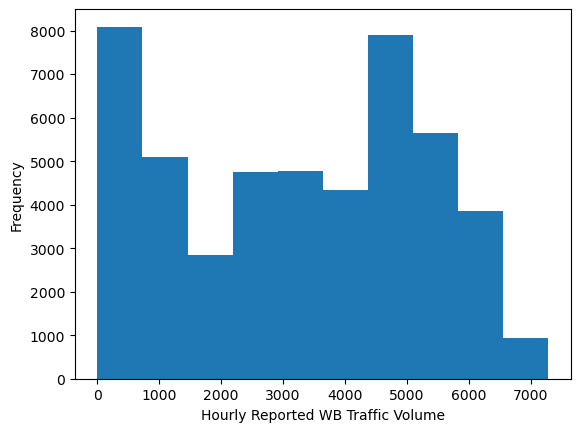

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Hourly Reported WB Traffic Volume')
plt.show()
traffic['traffic_volume'].describe()

The data collection took place between 2012-10-02 09:00:00 and 2018-09-30 23:00:00. The hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars. We can see the traffic volume is less than 5,000 vehicles for most of the time -  about 70% of the time.  The remainder of the time, the traffic volume is greater than 5,000.  It is possible that traffic volume is impacted by the time of day (daytime/nighttime).  But to be sure, we can analyze the date_time column with respect to the traffic_volume column.

### Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two sort of arbitrary parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime.shape)
nighttime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime.shape)

(23877, 9)
(24327, 9)


Looking at the shapes, we see that daytime has 450 less rows than nighttime. We see that the dataset does in fact seem to have missing values.

Now that we've isolated daytime and nighttime data, we can plot two histograms to more clearly see the relationship between the time of day and the volume of traffic. 

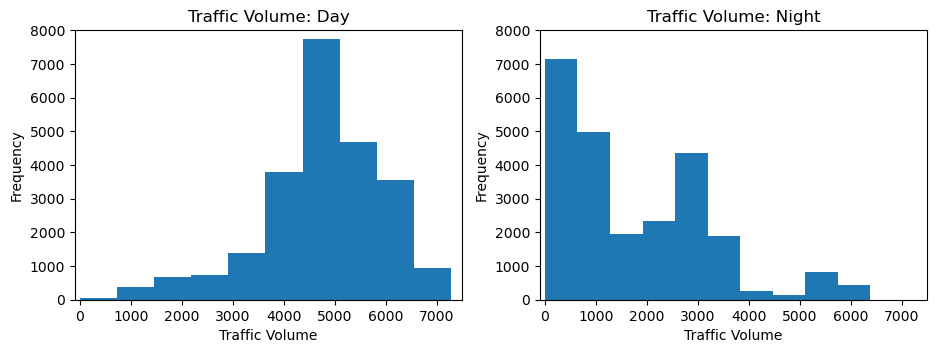

In [5]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [6]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The shape of the histograms provide some insights into the traffic situation.

The traffic distribution of the daytime histogram is skewed left, which indicates higher traffic volume values being reported.  The statistics show that 25% of the daytime traffic volume values are less than 4,252.  This means that 75% of the time, there are more than 4,252 vehicles passing the monitoring station each hour.

The traffic distribution of the nighttime histogram is more right skewed, which indicates lower traffic volume values being reported.  The statistics show that 75% of the nighttime traffic volume values are less than 2,819 each hour.

In considering this, we can see that traffic is generally low in volume during the nighttime hours.  We are attempting to find indicators of heavy traffic.  The nighttime data will not be of use.  We will use the daytime data.

### Time Indicators

One possible indicator of heavy traffic is the time of day.  Within the daytime, there may be certain months, certain days, or a certain time of day we see more people on the road.  We can visualize this in the data by plotting how the volume of traffic changed according to the Month, the day of the week, and the time of day.  We will accomplish this using the DataFrame.groupby() method.

#### Month

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


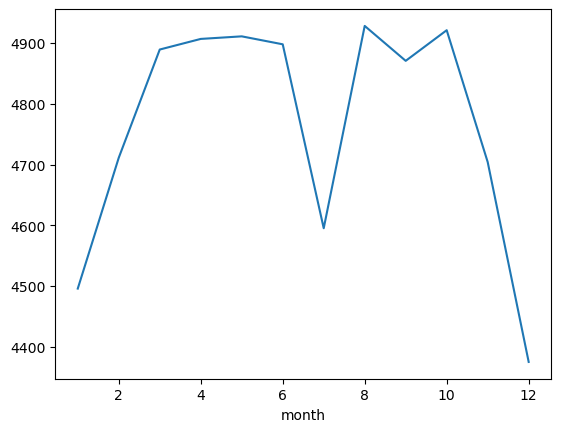

In [8]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean(numeric_only=True)
print(by_month['traffic_volume'])
by_month['traffic_volume'].plot.line()
plt.show()

With the exception of the month of July, traffic volume is lighter between December and March (the colder months) and heavier during the warmer months.  It makes sense that people would spend less time on the road and more time in the warmth and comfort of their homes during the colder months.  Now we need to determine what is happening with July.  This can be accomplished by looking at how the volume of traffic changes in July yearly.

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64


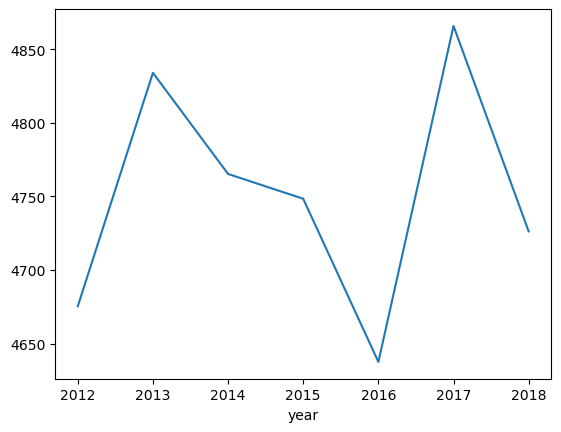

In [9]:
daytime['year'] = daytime['date_time'].dt.year
by_year = daytime.groupby('year').mean(numeric_only=True)
print(by_year['traffic_volume'])
by_year['traffic_volume'].plot.line()
plt.show()

Each year, the month of July sees traffic volume values above 4,650 vehicles per hour, except for in the year 2016. There are any number of possible explanations for this decrease in traffic volume during that time.  Likely, the road was closed that month.  Regardless of the reason, we see that except for the year 2016, traffic volume during the month of July was high - almost 5,000 vehicles per hour during the daytime, as it was during the other warm months.

#### Day of The Week

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


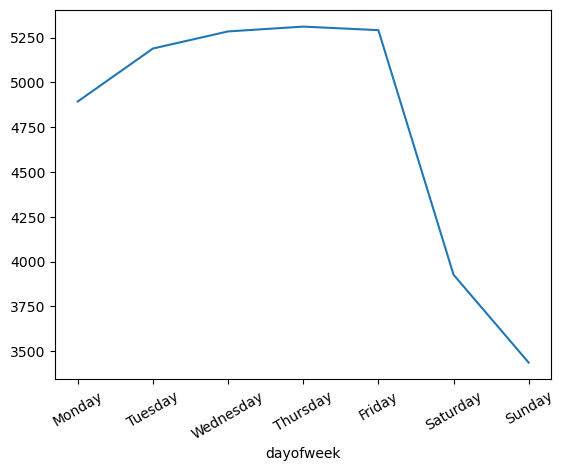

In [10]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean(numeric_only=True)
print(by_dayofweek['traffic_volume'])  # 0 is Monday, 6 is Sunday
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], rotation=30)
plt.show()

As reasonably expected, traffic volume decreases significantly on the weekend days - Saturday and Sunday.  We can assume this is because most people are not commuting to and from work on these days.  We will not consider Saturday and Sunday when looking at the next time unit.

#### Time of Day

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


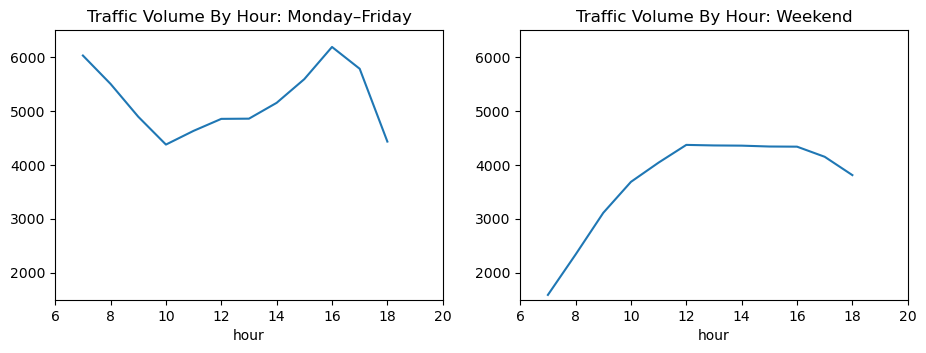

In [11]:
daytime['hour'] = daytime['date_time'].dt.hour
weekdays = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 = Saturday
by_hour_weekdays = weekdays.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_weekdays['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_weekdays['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

These line graphs drive home the point that traffic volume is generally higher on weekdays than on weekend days at the same hour of the day.  So, looking at the three specified time units, we have seen that:

- Warmer months (April - November) usually have heavier traffic than colder months (December - March)
- Weekdays (Monday - Friday) usually have heavier traffic than weekend days (Saturday and Sunday)
- Considering only weekdays, the heaviest traffic is at hours 7 and 16

### Weather Indicators

The dataset also considers weather conditions as possible indicators of heavy traffic, including temperature, rain, snow, cloud cover, and overall weather conditions.  We can use this data to see correlations between traffic volume and weather conditions.

#### Correlations

In [24]:
day_numeric = daytime.drop('weather_main', axis=1)
day_numeric = day_numeric.drop( 'weather_description', axis=1)
day_numeric.corr()['traffic_volume']

holiday                NaN
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
date_time        -0.007153
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The DataFrame.corr() method would not work until columns containing non-numerical values (weather_main and weather_description) were dropped.  After dropping those columns, the strongest correlation out of temperature, rain, snow, and cloud cover is temperature at +0.128.

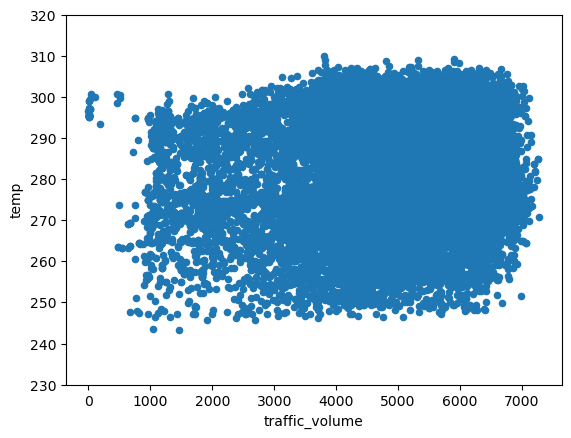

In [25]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()

Based on this scatter plot, it can be concluded that temperature is not a strong indicator of heavy traffic volume.  Seeing as how none of the other columns has a strong correlation, it seems as though those weather columns are also not reliable indicators of heavy traffic volume.

Now, the dropped columns (weather_main and weather_description) can be considered.  Using a group_by() method, a bar plot can be used to analyze these categorical weather-related columns.

#### By weather_main

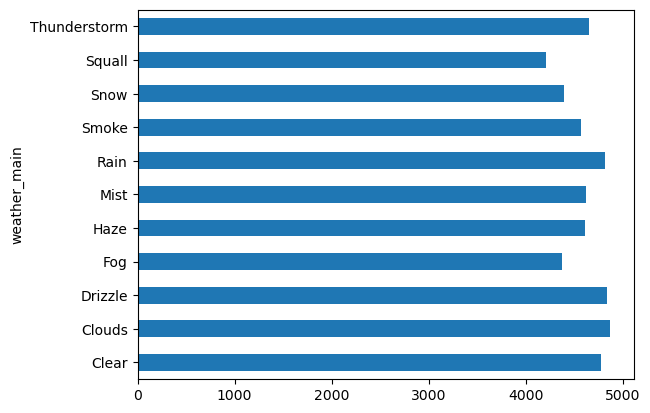

In [26]:
by_weather_main = daytime.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime.groupby('weather_description').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is no traffic volume exceeding 5,000 cars.  None of these weather conditions is a strong indicator of heavy traffic volume.

#### By weather_description

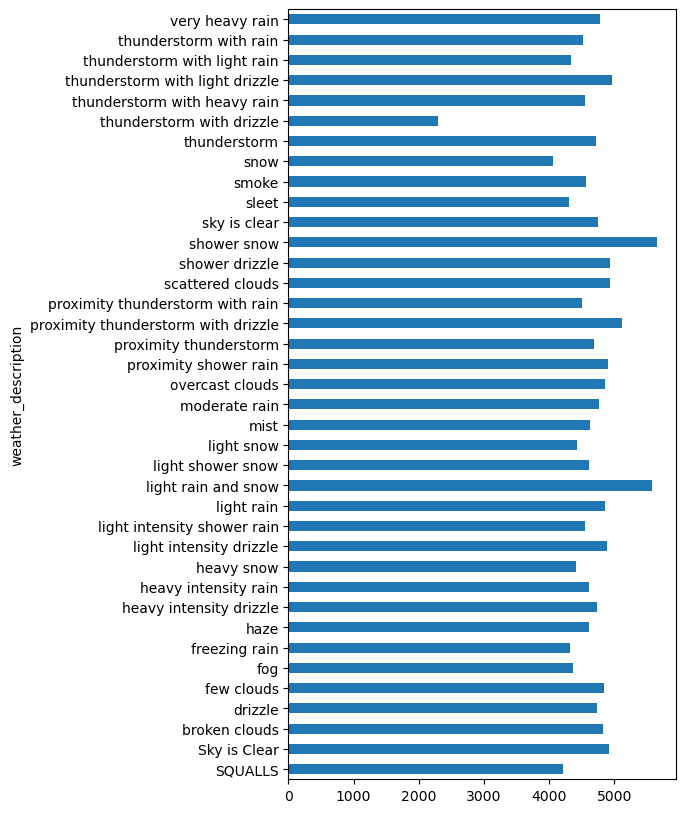

In [28]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

The weather conditions where traffic volume exceeds 5,000 cars are shower snow, proximity thunderstorm with drizzle, and light rain and snow.  However, there is no clear explanation as to why these particular weather conditions resulted in higher traffic volume.

### Conclusion

This project analyzed traffic data recorded at a station along a westbound I-94 lane of traffic.  The data was broken down into two types of indicators: time and weather.  Here is what was determined:

   ##### Time Indicators
   - Warmer months (April - November) usually have heavier traffic than colder months (December - March)
   - Weekdays (Monday - Friday) usually have heavier traffic than weekend days (Saturday and Sunday)
   - Considering only weekdays, the heaviest traffic is at hours 7 and 16
        
   ##### Weather Indicators
   - Shower snow
   - Proximity thunderstorm with drizzle
   - Light rain and snow